In [6]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [7]:
df = pd.read_excel("Data/10302019-spots-phases.xlsx",).fillna("NA")
df.head()

,Unnamed: 0,A,sigma,x0,y0,baseline,height,x,y,mass,frame,particle,cell_index,cell,cell_x,cell_y,cellnum,Stage
0,0,2822.353329,1.426044,2.464625,1.441381,4370.000000,7192.353329,16.000000,17.000000,0.185206,4,0,0,0,178.481084,35.270278,0,NA
1,1,5450.205861,0.872063,1.934051,2.248749,6367.507760,11817.713621,17.000000,16.000000,0.185206,5,0,12,0,175.643722,34.108812,0,NA
2,2,9719.751736,0.736530,1.628154,2.138491,9757.099531,19476.851267,17.000000,16.000000,0.185206,6,0,14,0,174.616637,34.060956,0,NA
3,3,4292.900340,1.114064,1.774154,1.630352,7626.017052,11918.917392,10.979656,14.998435,0.180988,7,1,29,0,174.856935,35.100799,0,NA
4,4,9322.068723,1.182431,3.097068,2.110484,7957.806034,17279.874757,15.020867,15.982343,0.176456,7,0,29,0,174.856935,35.100799,0,NA


In [8]:
newdf = pd.read_pickle("Data/103019-spots-normalized.pkl")
newdf['Stage'] = 'x'
newdf.head()

,A,sigma,x0,y0,baseline,height,x,y,mass,frame,particle,cell_index,cell,cell_x,cell_y,cellnum,mean_intensity,Stage
0,0.686019,1.426044,2.464625,1.441381,1.062200,1.748219,16.000000,17.000000,0.185206,4,0,0,0,178.481084,35.270278,0,4114.102539,x
1,1.017244,0.872063,1.934051,2.248749,1.188452,2.205695,17.000000,16.000000,0.185206,5,0,12,0,175.643722,34.108812,0,5357.817871,x
2,1.295858,0.736530,1.628154,2.138491,1.300837,2.596695,17.000000,16.000000,0.185206,6,0,14,0,174.616637,34.060956,0,7500.630371,x
3,0.557517,1.114063,1.774153,1.630352,0.990387,1.547904,10.979656,14.998435,0.180988,7,1,29,0,174.856935,35.100799,0,7700.035156,x
4,1.210653,1.182431,3.097068,2.110484,1.033477,2.244129,15.020867,15.982343,0.176456,7,0,29,0,174.856935,35.100799,0,7700.035156,x


In [9]:
jon = ['frame', 'particle', 'cellnum']
jdf = pd.merge(df, newdf, on=jon, how='left', copy=True)
print(jdf.shape, df.shape, newdf.shape)
print(jdf[jdf.Stage_x != 'NA'].shape, df[df.Stage != 'NA'].shape)
jdf['integral'] = jdf['A_y']*(jdf['sigma_y']**2)
jdf.Stage_x.head()

(6592, 33) (6592, 18) (6625, 18)
(156, 33) (156, 18)


0    NA
1    NA
2    NA
3    NA
4    NA
Name: Stage_x, dtype: object

In [10]:
sdf = jdf[jdf.Stage_x != "NA"].copy()
#sdf['integral'] = sdf['A_y']*sdf['sigma_y']**2
#sdf = sdf[sdf.baseline_y > .8]
sdf.columns

Index(['Unnamed: 0', 'A_x', 'sigma_x', 'x0_x', 'y0_x', 'baseline_x',
       'height_x', 'x_x', 'y_x', 'mass_x', 'frame', 'particle', 'cell_index_x',
       'cell_x', 'cell_x_x', 'cell_y_x', 'cellnum', 'Stage_x', 'A_y',
       'sigma_y', 'x0_y', 'y0_y', 'baseline_y', 'height_y', 'x_y', 'y_y',
       'mass_y', 'cell_index_y', 'cell_y', 'cell_x_y', 'cell_y_y',
       'mean_intensity', 'Stage_y', 'integral'],
      dtype='object')

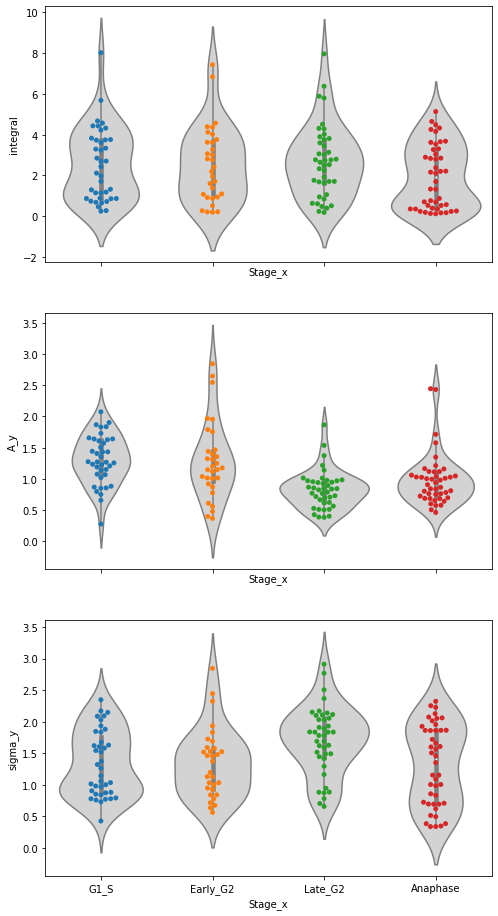

In [11]:
fig, axs = plt.subplots(3, 1, sharex=True, squeeze=True, figsize=(8,16))
sns.violinplot(x='Stage_x', y='integral',data=sdf, color='lightgrey', ax=axs[0])
sns.swarmplot(x='Stage_x', y='integral', data=sdf, ax=axs[0])
sns.violinplot(x='Stage_x', y='A_y', data=sdf, color='lightgrey', ax=axs[1])
sns.swarmplot(x='Stage_x', y='A_y', data=sdf, ax=axs[1])
sns.violinplot(x='Stage_x', y='sigma_y', data=sdf, color='lightgrey', ax=axs[2])
sns.swarmplot(x='Stage_x', y='sigma_y', data=sdf, ax=axs[2])
plt.savefig("stage_intensity_normalized.pdf")

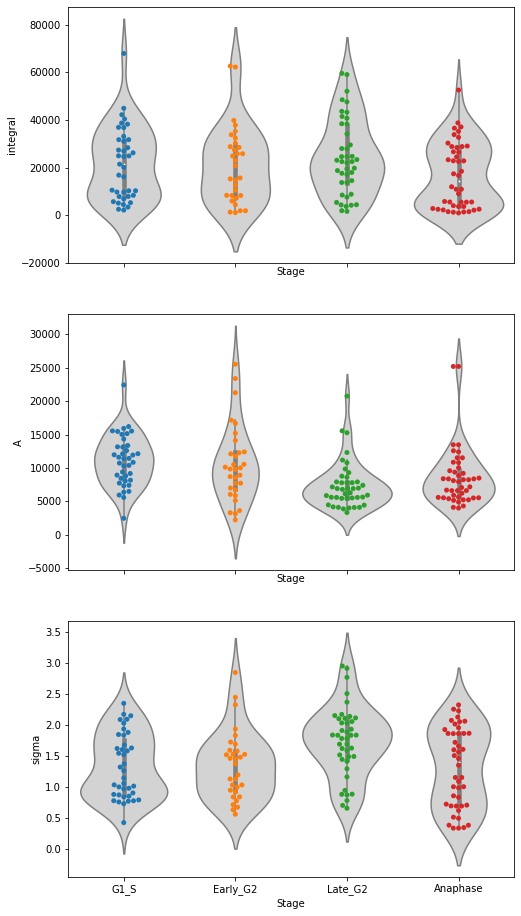

In [12]:
df['integral'] = df['A']*(df['sigma']**2)
ndf = df[df.Stage != 'NA']
fig, axs = plt.subplots(3, 1, sharex=True, squeeze=True, figsize=(8,16))
sns.violinplot(x='Stage', y='integral',data=ndf, color='lightgrey', ax=axs[0])
sns.swarmplot(x='Stage', y='integral', data=ndf, ax=axs[0])
sns.violinplot(x='Stage', y='A', data=ndf, color='lightgrey', ax=axs[1])
sns.swarmplot(x='Stage', y='A', data=ndf, ax=axs[1])
sns.violinplot(x='Stage', y='sigma', data=ndf, color='lightgrey', ax=axs[2])
sns.swarmplot(x='Stage', y='sigma', data=ndf, ax=axs[2])
plt.savefig("stage_intensity.pdf")

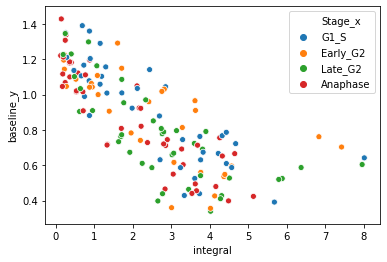

In [13]:
sns.scatterplot(x="integral", y="baseline_y", hue="Stage_x", data=sdf)

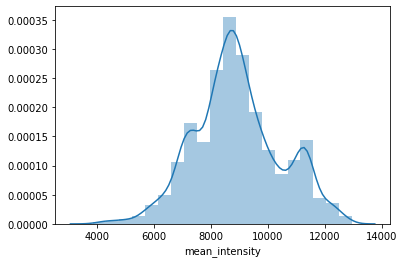

In [14]:
sns.distplot(newdf.mean_intensity, bins=20)

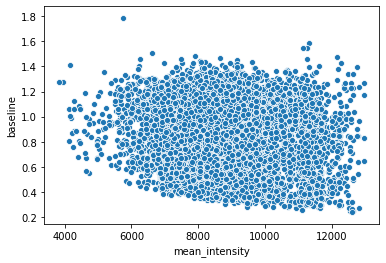

In [15]:
sns.scatterplot(x="mean_intensity", y="baseline", data=newdf)

In [16]:
stage_cells = sdf[sdf['Stage_x'] != 'NA'].cell_x.unique()

In [17]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('plots_integrated_normalized.pdf') as pdf:
    ncells = len(stage_cells)
    for ie, c in enumerate(stage_cells):
        cell = c
        colors = sns.color_palette()
        t = jdf[jdf.cell_x == cell]
        st = sdf[sdf.cell_x == cell]
        #print(st.frame)
        plt.figure(figsize=(12,8))
        sns.lineplot(x='frame', y='integral', data=t,  err_style=None, color='grey')
        sns.scatterplot(x='frame', y='integral', hue="Stage_x", data=st, s=100)
        ic = 0
        for xv in st.frame.unique():
            plt.axvline(xv, color=colors[ic])
            ic += 1
            if ic > 3:
                ic = 0
        plt.title("{}/{} - cell number {}".format(ie, ncells, cell))
        pdf.savefig()
        plt.close()
        print("{}/{} - cell number {}".format(ie, ncells, cell))
#sdf[sdf.cell == cell]


0/36 - cell number 0
1/36 - cell number 1
2/36 - cell number 3
3/36 - cell number 5
4/36 - cell number 6
5/36 - cell number 7
6/36 - cell number 9
7/36 - cell number 11
8/36 - cell number 12
9/36 - cell number 13
10/36 - cell number 14
11/36 - cell number 15
12/36 - cell number 16
13/36 - cell number 17
14/36 - cell number 18
15/36 - cell number 20
16/36 - cell number 21
17/36 - cell number 22
18/36 - cell number 24
19/36 - cell number 25
20/36 - cell number 26
21/36 - cell number 27
22/36 - cell number 28
23/36 - cell number 31
24/36 - cell number 33
25/36 - cell number 35
26/36 - cell number 36
27/36 - cell number 38
28/36 - cell number 42
29/36 - cell number 45
30/36 - cell number 52
31/36 - cell number 59
32/36 - cell number 61
33/36 - cell number 67
34/36 - cell number 68
35/36 - cell number 69


In [ ]:
grid = sns.FacetGrid()

In [187]:
sg1 = sdf[sdf.Stage == 'G1_S']
seg2 = sdf[sdf.Stage == 'Early_G2']
stg2 = sdf[sdf.Stage == 'Late_G2']
sana = sdf[sdf.Stage == 'Anaphase']

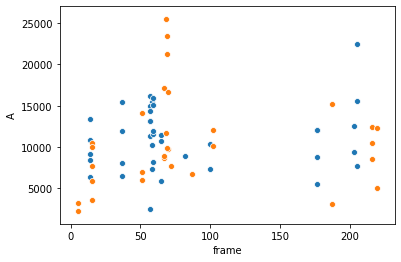

In [230]:
sns.scatterplot(sg1.frame, sg1.A)
sns.scatterplot(seg2.frame, seg2.A)

In [222]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]